In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
%matplotlib inline
import warnings

In [2]:
train = pd.read_csv('Train_SU63ISt.csv')
test = pd.read_csv("Test_0qrQsBZ.csv")

In [3]:
train.head(4)

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2


In [4]:
train_original = train.copy()
test_original = test.copy()

In [5]:
train.columns,test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [6]:
train.dtypes, test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

In [7]:
train.shape, test.shape

((18288, 3), (5112, 2))

**Feature Extraction**

In [8]:
train['Datetime'] = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime, format='%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime, format='%d-%m-%Y %H:%M')

In [9]:
train.head(4)

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2


In [10]:
for i in(train, test, train_original, test_original):
  i['year'] = i.Datetime.dt.year
  i['month'] = i.Datetime.dt.month
  i['day'] = i.Datetime.dt.day
  i['Hour'] = i.Datetime.dt.hour

In [11]:
train.head(4)

,ID,Datetime,Count,year,month,day,Hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3


In [12]:
train['day of week'] = train['Datetime'].dt.dayofweek
temp = train['Datetime']

In [13]:
train.head(4)

,ID,Datetime,Count,year,month,day,Hour,day of week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5


In [14]:
def applyer(row):
  if row.dayofweek == 5 or row.dayofweek == 6:
    return 1
  else:
    return 0

In [15]:
temp2 = temp.apply(applyer)
train['weekend'] = temp2
train.head(4)

,ID,Datetime,Count,year,month,day,Hour,day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1


In [16]:
train.index = train['Datetime']
df = train.drop('ID',1)
ts = df['Count']

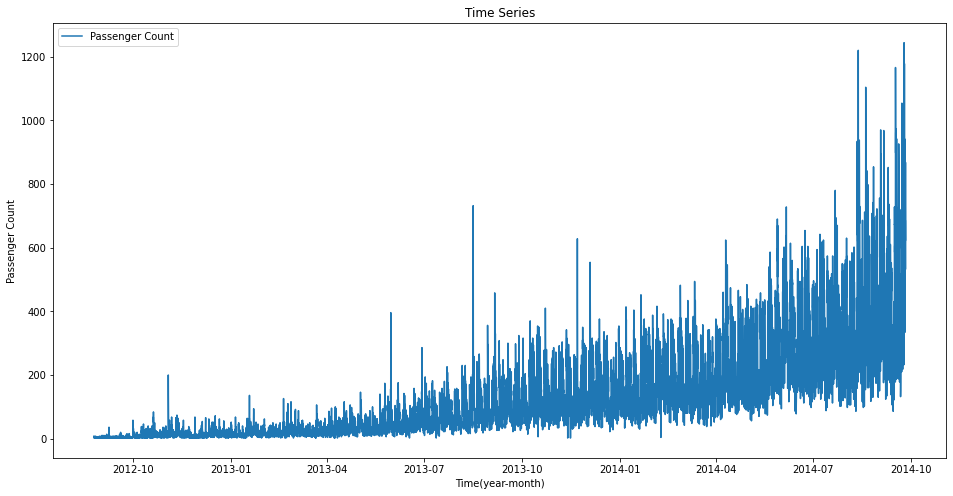

In [17]:
plt.figure(figsize=(16,8))
plt.plot(ts, label='Passenger Count')
plt.title('Time Series')
plt.xlabel('Time(year-month)')
plt.ylabel('Passenger Count')
plt.legend(loc='best')

**Exploratory Analysis**

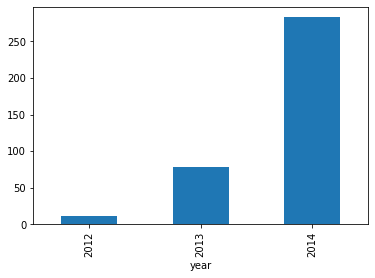

In [18]:
train.groupby('year')['Count'].mean().plot.bar()

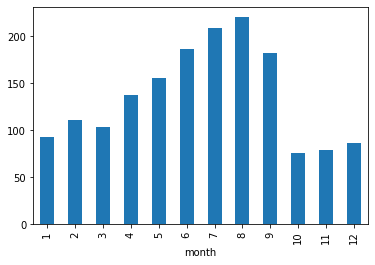

In [19]:
train.groupby('month')['Count'].mean().plot.bar()

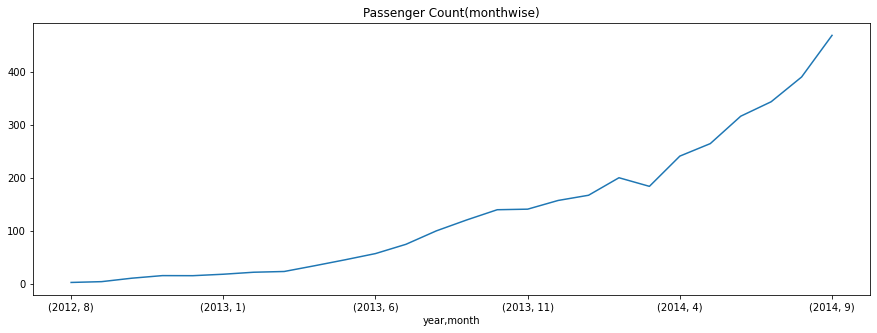

In [20]:
temp3 = train.groupby(['year', 'month'])['Count'].mean()
temp3.plot(figsize=(15,5), title ='Passenger Count(monthwise)')

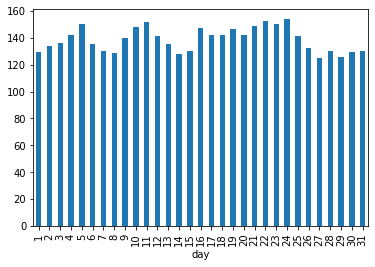

In [21]:
train.groupby('day')['Count'].mean().plot.bar()

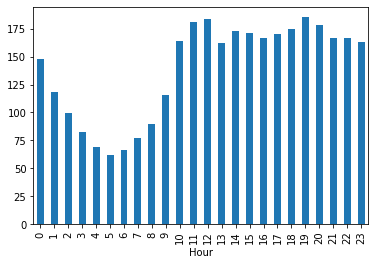

In [22]:
train.groupby('Hour')['Count'].mean().plot.bar()

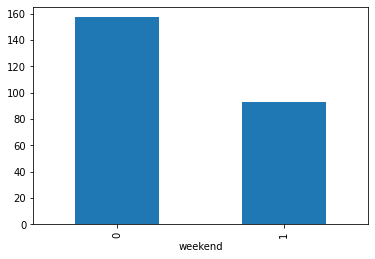

In [23]:
train.groupby('weekend')['Count'].mean().plot.bar()

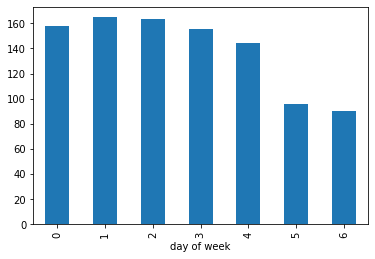

In [24]:
train.groupby('day of week')['Count'].mean().plot.bar()

In [25]:
train = train.drop('ID',1)

In [26]:
train.Timestamp = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.index = train.Timestamp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [27]:
hourly = train.resample('H').mean()
daily = train.resample('D').mean()
weekly = train.resample('W').mean()
monthly = train.resample('M').mean()

In [28]:
hourly.shape, daily.shape, weekly.shape,  monthly.shape

((18288, 7), (762, 7), (110, 7), (26, 7))

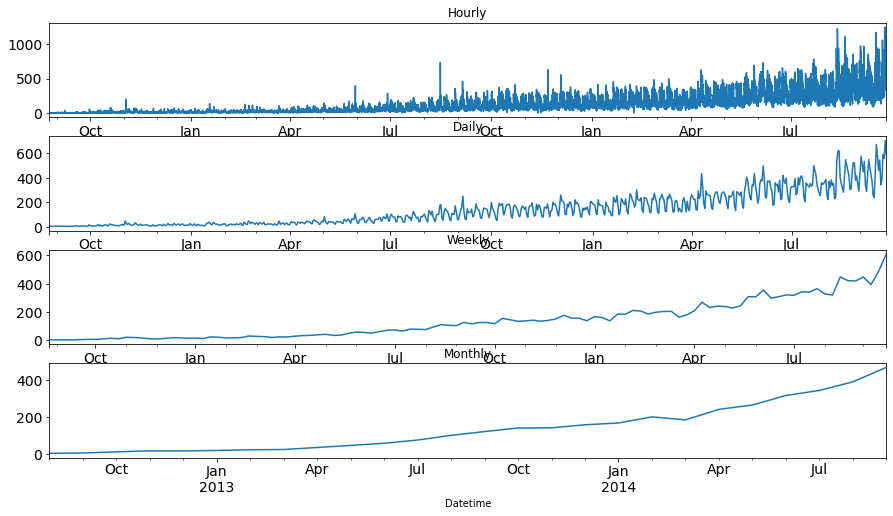

In [29]:
fig, axs = plt.subplots(4,1)
hourly.Count.plot(figsize = (15,8), title = 'Hourly', fontsize = 14, ax=axs[0])
daily.Count.plot(figsize = (15,8), title = 'Daily', fontsize = 14, ax=axs[1])
weekly.Count.plot(figsize = (15,8), title = 'Weekly', fontsize = 14, ax=axs[2])
monthly.Count.plot(figsize = (15,8), title = 'Monthly', fontsize = 14, ax=axs[3])

In [30]:
test.Timestamp = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
test.index = test.Timestamp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [31]:
test = test.resample('D').mean()
test.head(4)

,ID,year,month,day,Hour
Datetime,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5
2014-09-27,18323.5,2014.0,9.0,27.0,11.5
2014-09-28,18347.5,2014.0,9.0,28.0,11.5
2014-09-29,18371.5,2014.0,9.0,29.0,11.5


In [32]:
train.Timestamp = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.index = train.Timestamp

In [33]:
train = train.resample('D').mean()
train.head(4)

,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0


**Data** **Split**

In [34]:
Train = train.loc['2012-08-25' : '2014-06-24']
valid = train.loc['2014-06-25' : '2014-09-25']

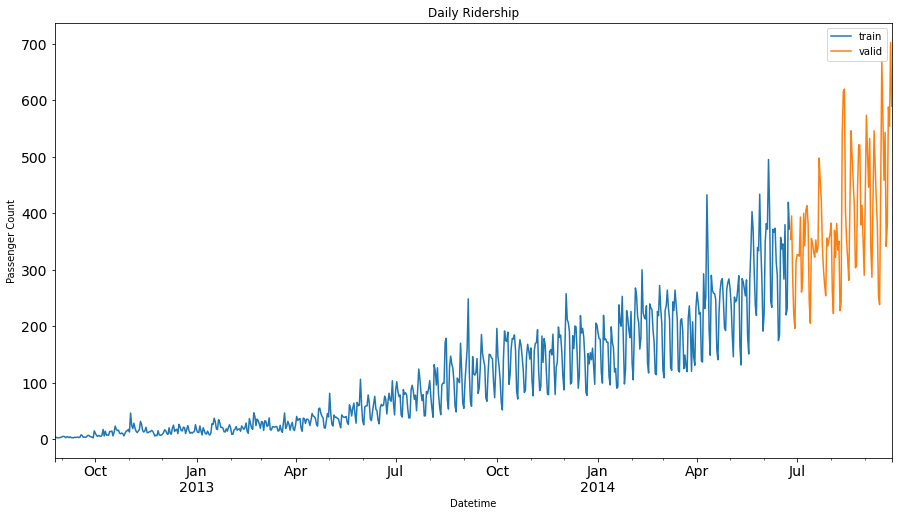

In [35]:
Train.Count.plot(figsize = (15,8), title = 'Daily Ridership', fontsize = 14, label='train')
valid.Count.plot(figsize = (15,8), title = 'Daily Ridership', fontsize = 14, label='valid')
plt.xlabel('Datetime')
plt.ylabel('Passenger Count') 
plt.legend(loc='best') 
plt.show()

**Naive** **Approach**

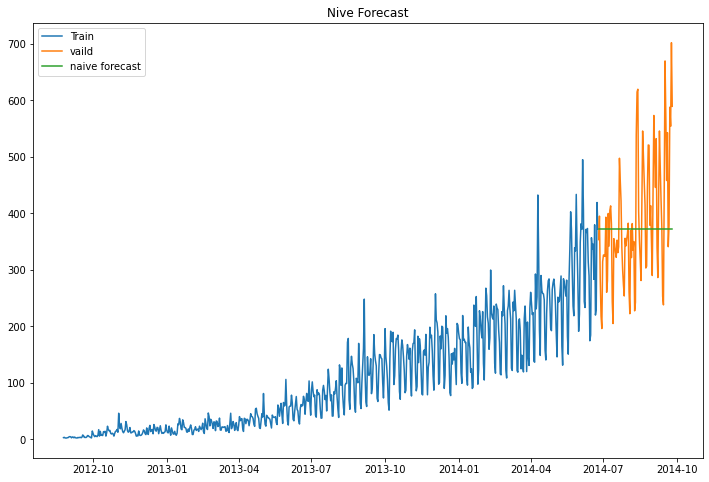

In [36]:
dd = np.asarray(Train.Count)
y_hat = valid.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(Train.index, Train['Count'], label='Train')
plt.plot(valid.index, valid['Count'], label='vaild')
plt.plot(y_hat.index, y_hat['naive'], label='naive forecast')
plt.legend(loc='best')
plt.title('Nive Forecast')
plt.show()

In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(valid.Count,y_hat.naive))
print(rmse)

111.79050467496724


**Moving Average**

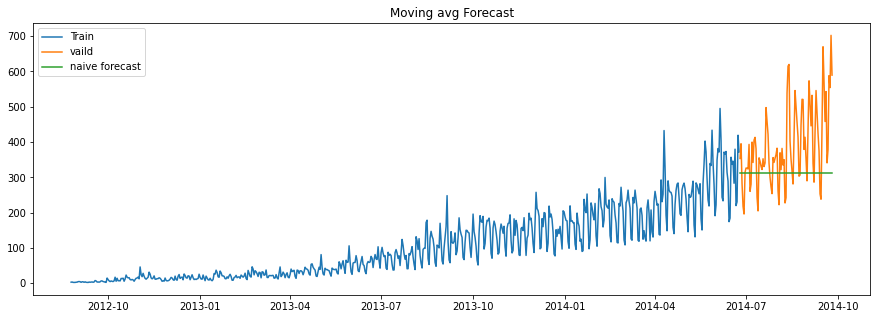

In [38]:
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1]
plt.figure(figsize=(15,5))
plt.plot(Train.index, Train['Count'], label='Train')
plt.plot(valid.index, valid['Count'], label='vaild')
plt.plot(y_hat.index, y_hat_avg['moving_avg_forecast'], label='naive forecast')
plt.legend(loc='best')
plt.title('Moving avg Forecast')
plt.show()

In [39]:
rmse = sqrt(mean_squared_error(valid.Count,y_hat_avg.moving_avg_forecast))
print(rmse)

134.23733308950264


**Simple Exponential Smoothing**

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


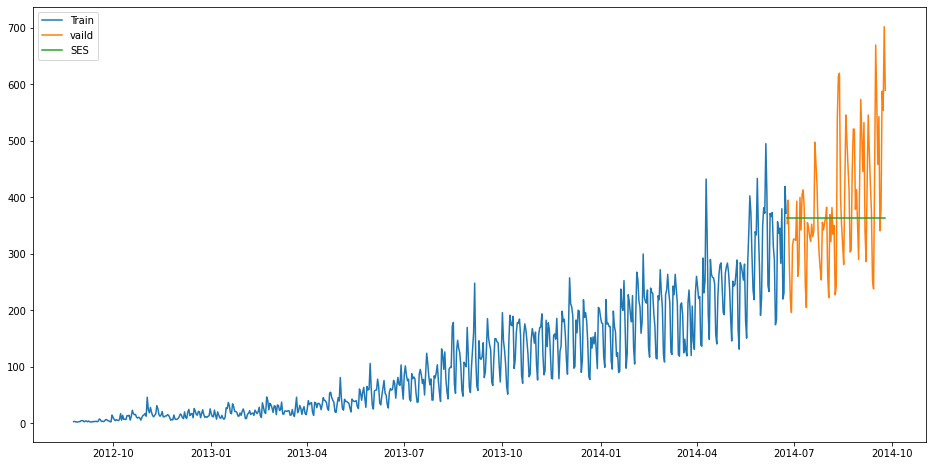

In [40]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level =0.6, optimized =False)
y_hat_avg['SES'] = fit2.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train.index, Train['Count'], label='Train')
plt.plot(valid.index, valid['Count'], label='vaild')
plt.plot(y_hat.index, y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [41]:
rmse = sqrt(mean_squared_error(valid.Count,y_hat_avg.SES))
print(rmse)

113.43708111884514


**Holt's Linear Model**

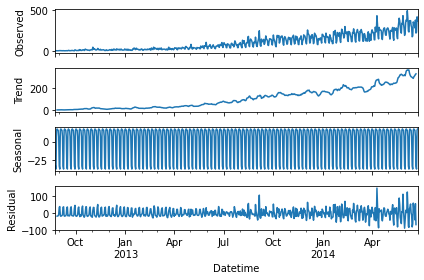

In [42]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()

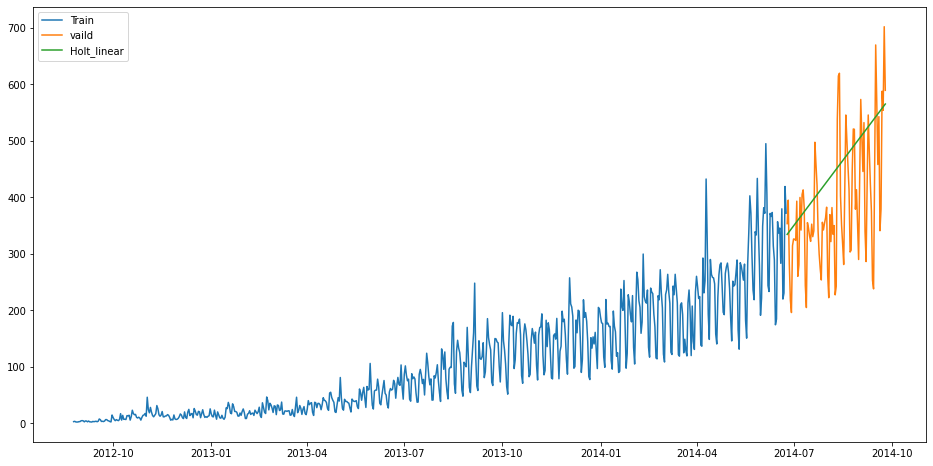

In [43]:
y_hat_avg = valid.copy()
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level =0.3, smoothing_slope =0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train.index, Train['Count'], label='Train')
plt.plot(valid.index, valid['Count'], label='vaild')
plt.plot(y_hat.index, y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [44]:
rmse = sqrt(mean_squared_error(valid.Count,y_hat_avg.Holt_linear))
print(rmse)

112.94278345314041


In [45]:
predict = fit1.forecast(len(test))
test['prediction'] = predict
print(test.head(4))
train_original['ratio'] = train_original['Count']/train_original['Count'].sum()
print(train_original.head(4))
temp = train_original.groupby(['Hour'])['ratio'].sum()
print(temp.head(4))
pd.DataFrame(temp,columns=['Hour', 'ratio']).to_csv('GROUPby.csv')

                 ID    year  month   day  Hour  prediction
Datetime                                                  
2014-09-26  18299.5  2014.0    9.0  26.0  11.5  334.650767
2014-09-27  18323.5  2014.0    9.0  27.0  11.5  337.159011
2014-09-28  18347.5  2014.0    9.0  28.0  11.5  339.667256
2014-09-29  18371.5  2014.0    9.0  29.0  11.5  342.175500
   ID            Datetime  Count  year  month  day  Hour         ratio
0   0 2012-08-25 00:00:00      8  2012      8   25     0  3.148037e-06
1   1 2012-08-25 01:00:00      2  2012      8   25     1  7.870093e-07
2   2 2012-08-25 02:00:00      6  2012      8   25     2  2.361028e-06
3   3 2012-08-25 03:00:00      2  2012      8   25     3  7.870093e-07
Hour
0    0.044287
1    0.035343
2    0.029911
3    0.024714
Name: ratio, dtype: float64


In [46]:
temp2 = pd.read_csv('GROUPby.csv')
temp2 = temp2.drop('Hour.1',1)

In [47]:
temp2.head(4)

,Hour,ratio
0,0,0.044287
1,1,0.035343
2,2,0.029911
3,3,0.024714


In [48]:
merge = pd.merge(test, test_original, on=('day','month','year'), how='left')
print(merge.head(4))
merge['Hour'] = merge['Hour_y']
merge = merge.drop(['year', 'month', 'Datetime', 'Hour_x', 'Hour_y'], axis=1)
print(merge.head(4))
prediction = pd.merge(merge, temp2, on='Hour', how='left')
print(prediction.head(4))

      ID_x    year  month   day  ...  prediction   ID_y            Datetime Hour_y
0  18299.5  2014.0    9.0  26.0  ...  334.650767  18288 2014-09-26 00:00:00      0
1  18299.5  2014.0    9.0  26.0  ...  334.650767  18289 2014-09-26 01:00:00      1
2  18299.5  2014.0    9.0  26.0  ...  334.650767  18290 2014-09-26 02:00:00      2
3  18299.5  2014.0    9.0  26.0  ...  334.650767  18291 2014-09-26 03:00:00      3

[4 rows x 9 columns]
      ID_x   day  prediction   ID_y  Hour
0  18299.5  26.0  334.650767  18288     0
1  18299.5  26.0  334.650767  18289     1
2  18299.5  26.0  334.650767  18290     2
3  18299.5  26.0  334.650767  18291     3
      ID_x   day  prediction   ID_y  Hour     ratio
0  18299.5  26.0  334.650767  18288     0  0.044287
1  18299.5  26.0  334.650767  18289     1  0.035343
2  18299.5  26.0  334.650767  18290     2  0.029911
3  18299.5  26.0  334.650767  18291     3  0.024714


In [49]:
prediction['Count'] = prediction['prediction']*prediction['ratio']*24
prediction['ID'] = prediction['ID_y']

In [50]:
submission = prediction.drop(['ID_x','day','ID_y','prediction', 'Hour', 'ratio'], axis=1)
pd.DataFrame(submission, columns=['ID', 'Count']).to_csv('Holt_linear.csv', index=False)

In [51]:
submission

,Count,ID
0,355.692974,18288
1,283.861602,18289
2,240.234347,18290
3,198.497058,18291
4,167.075574,18292
...,...,...
5107,1156.675482,23395
5108,1111.525192,23396
5109,1037.491153,23397
5110,1041.255041,23398


**Holt's Winter Model**

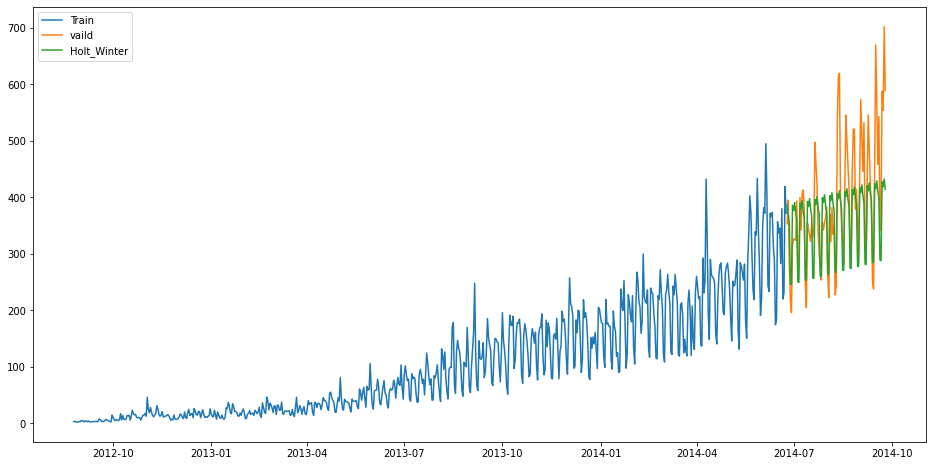

In [52]:
y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train['Count']),seasonal_periods=7, trend= 'add', seasonal='add').fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train.index, Train['Count'], label='Train')
plt.plot(valid.index, valid['Count'], label='vaild')
plt.plot(y_hat.index, y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [53]:
rmse = sqrt(mean_squared_error(valid.Count,y_hat_avg.Holt_Winter))
print(rmse)

82.37571191747172


In [54]:
predict = fit1.forecast(len(test))
test['prediction'] = predict
print(test.head(4))
merge = pd.merge(test, test_original, on=('day','month','year'), how='left')
print(merge.head(4))
merge['Hour'] = merge['Hour_y']
merge = merge.drop(['year', 'month', 'Datetime', 'Hour_x', 'Hour_y'], axis=1)

                 ID    year  month   day  Hour  prediction
Datetime                                                  
2014-09-26  18299.5  2014.0    9.0  26.0  11.5  387.359995
2014-09-27  18323.5  2014.0    9.0  27.0  11.5  369.135921
2014-09-28  18347.5  2014.0    9.0  28.0  11.5  355.563302
2014-09-29  18371.5  2014.0    9.0  29.0  11.5  247.088754
      ID_x    year  month   day  ...  prediction   ID_y            Datetime Hour_y
0  18299.5  2014.0    9.0  26.0  ...  387.359995  18288 2014-09-26 00:00:00      0
1  18299.5  2014.0    9.0  26.0  ...  387.359995  18289 2014-09-26 01:00:00      1
2  18299.5  2014.0    9.0  26.0  ...  387.359995  18290 2014-09-26 02:00:00      2
3  18299.5  2014.0    9.0  26.0  ...  387.359995  18291 2014-09-26 03:00:00      3

[4 rows x 9 columns]


In [55]:
prediction = pd.merge(merge, temp2, on='Hour', how='left')
print(prediction.head(4))
prediction['Count'] = prediction['prediction']*prediction['ratio']*24
prediction['ID'] = prediction['ID_y']

      ID_x   day  prediction   ID_y  Hour     ratio
0  18299.5  26.0  387.359995  18288     0  0.044287
1  18299.5  26.0  387.359995  18289     1  0.035343
2  18299.5  26.0  387.359995  18290     2  0.029911
3  18299.5  26.0  387.359995  18291     3  0.024714


In [56]:
submission = prediction.drop(['ID_x','day','ID_y','prediction', 'Hour', 'ratio'], axis=1)
pd.DataFrame(submission, columns=['ID', 'Count']).to_csv('Holt_Winter.csv', index=False)

In [57]:
submission

,Count,ID
0,411.716459,18288
1,328.571274,18289
2,278.072500,18290
3,229.761373,18291
4,193.390842,18292
...,...,...
5107,614.630080,23395
5108,590.638281,23396
5109,551.298338,23397
5110,553.298379,23398


**Stationary Check**

In [58]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(24).mean()
    rolstd = timeseries.rolling(24).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

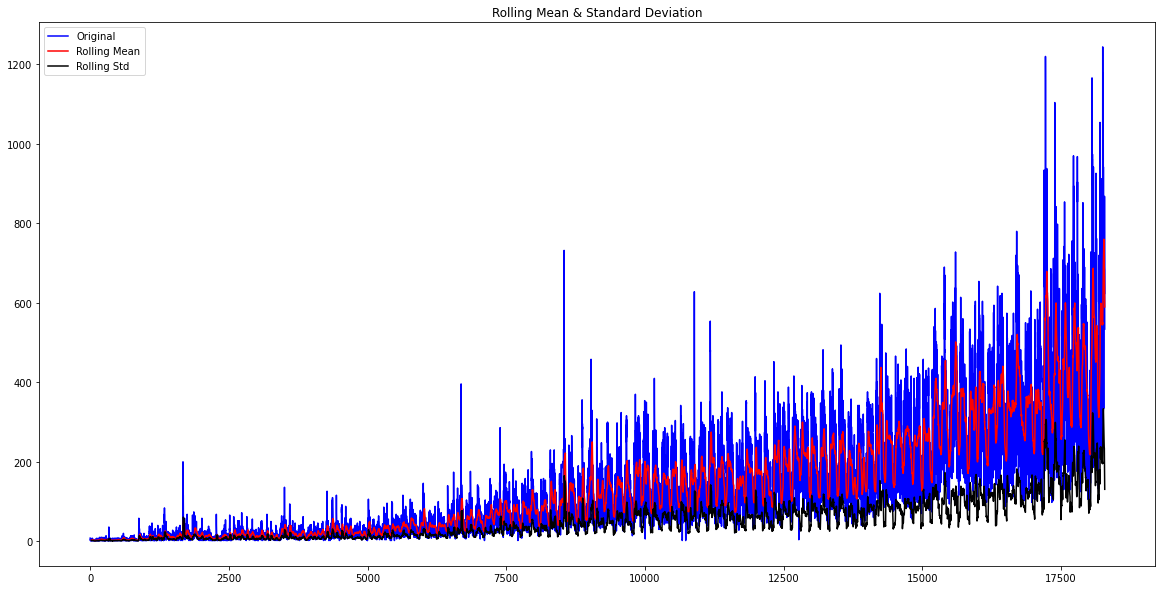

Results of Dickey-Fuller Test:
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [59]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
test_stationarity(train_original['Count'])

**Removing Trend**

In [60]:
Train_log = np.log(Train['Count'])
valid_log = np.log(valid['Count'])

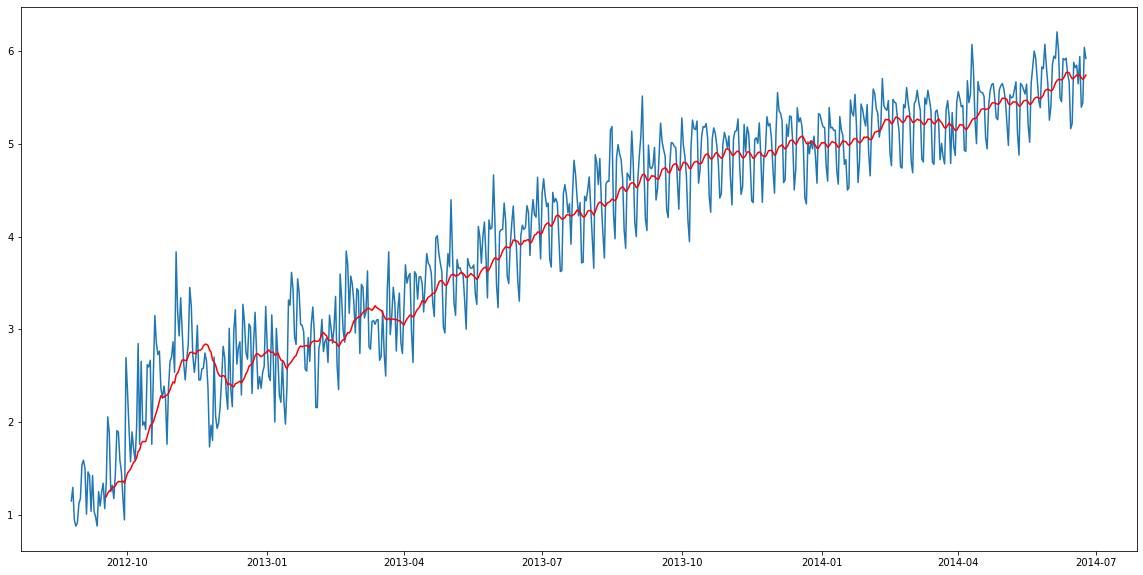

In [61]:
moving_avg = Train_log.rolling(24).mean()
plt.plot(Train_log)
plt.plot(moving_avg, color='red')
plt.show()

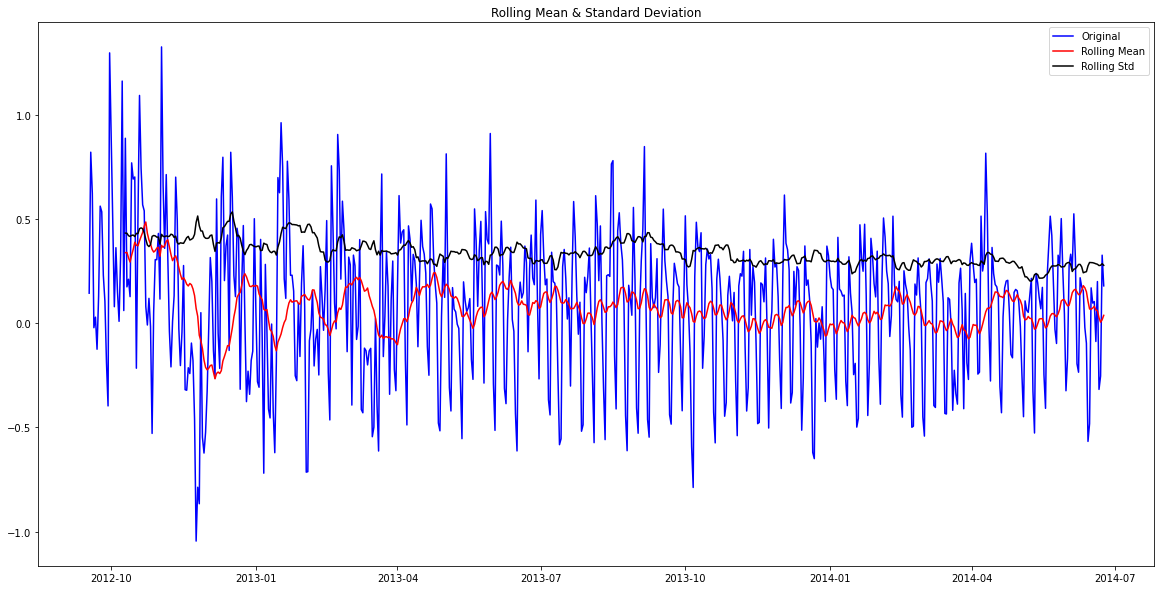

Results of Dickey-Fuller Test:
Test Statistic                -5.861646e+00
p-value                        3.399422e-07
#Lags Used                     2.000000e+01
Number of Observations Used    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


In [62]:
train_log_moving_avg_diff = Train_log - moving_avg
train_log_moving_avg_diff.dropna(inplace = True)
test_stationarity(train_log_moving_avg_diff)

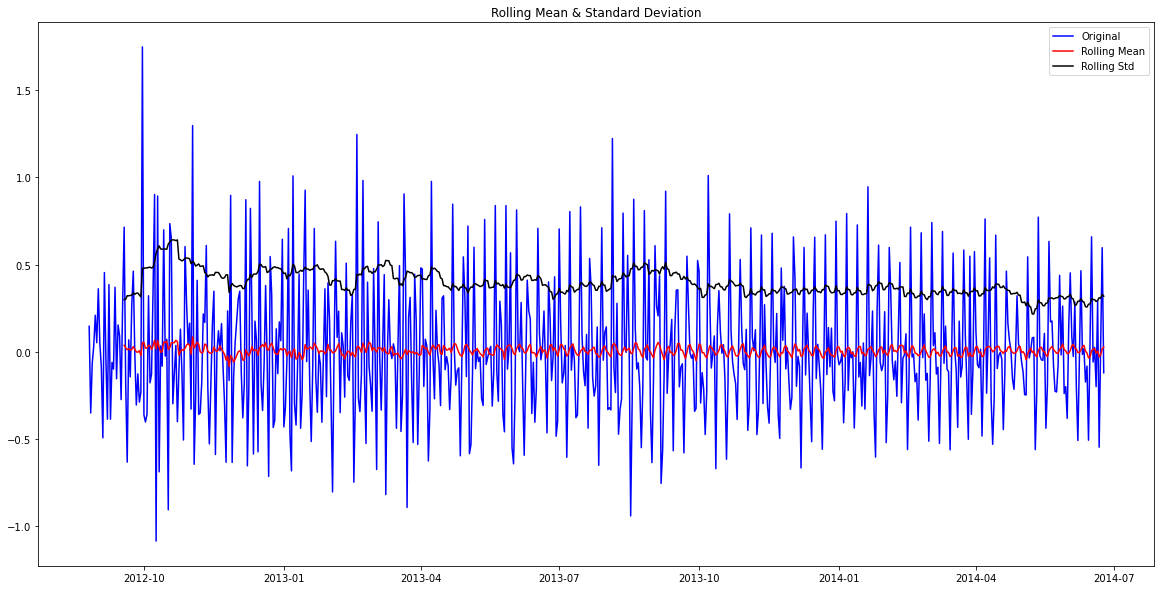

Results of Dickey-Fuller Test:
Test Statistic                -8.237568e+00
p-value                        5.834049e-13
#Lags Used                     1.900000e+01
Number of Observations Used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64


In [63]:
train_log_diff = Train_log - Train_log.shift(1)
test_stationarity(train_log_diff.dropna())

**Removing Seasonality**

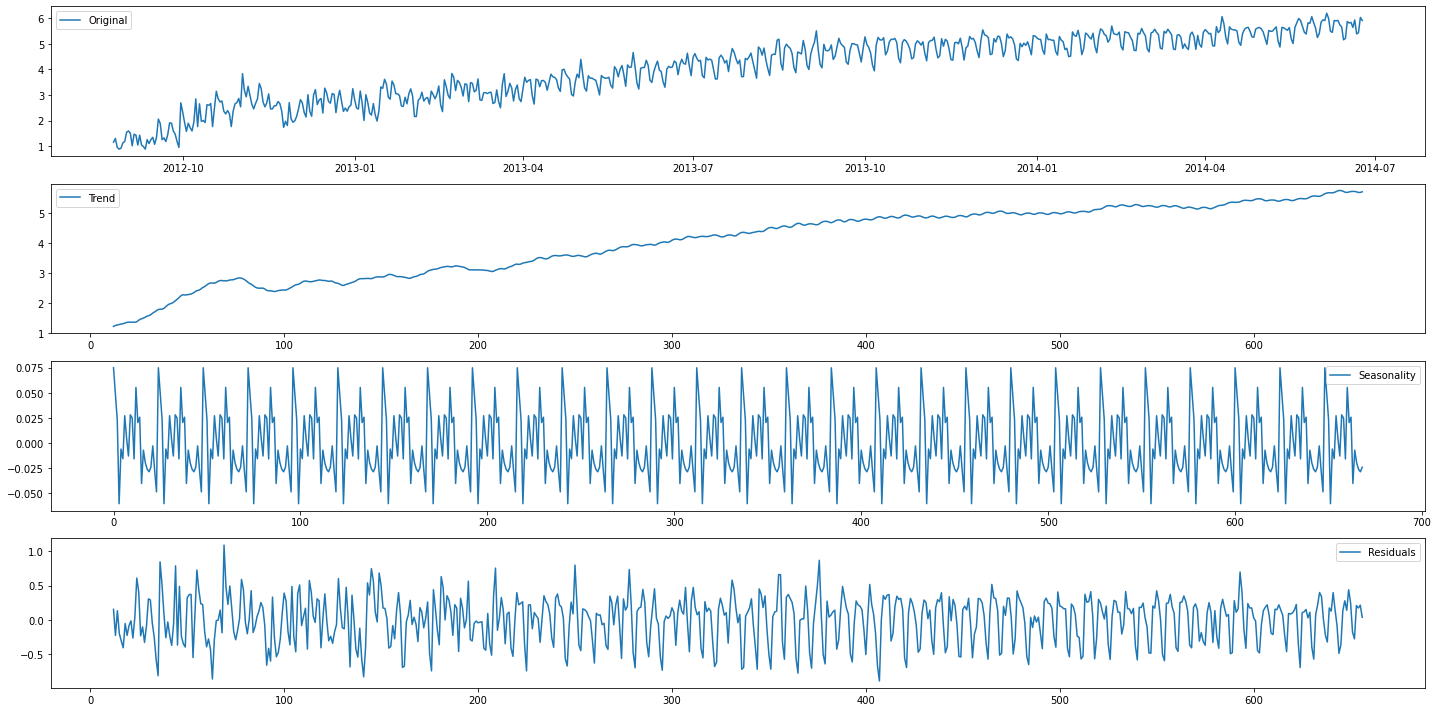

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, freq = 24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(Train_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

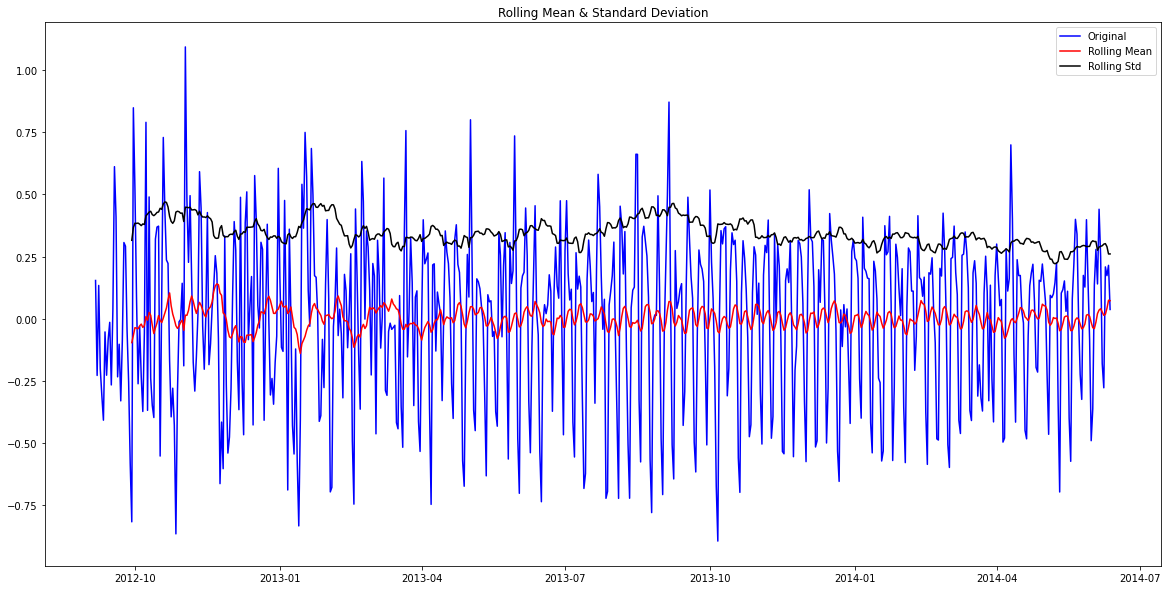

Results of Dickey-Fuller Test:
Test Statistic                -7.822096e+00
p-value                        6.628321e-12
#Lags Used                     2.000000e+01
Number of Observations Used    6.240000e+02
Critical Value (1%)           -3.440873e+00
Critical Value (5%)           -2.866183e+00
Critical Value (10%)          -2.569243e+00
dtype: float64


In [65]:
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = Train_log.index
train_log_decompose.set_index('date', inplace = True)
train_log_decompose.dropna(inplace=True)
test_stationarity(train_log_decompose[0])

**ACF, PACF**

In [66]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(train_log_diff.dropna(), nlags=25)
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method='ols')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Autocorrelation Function')

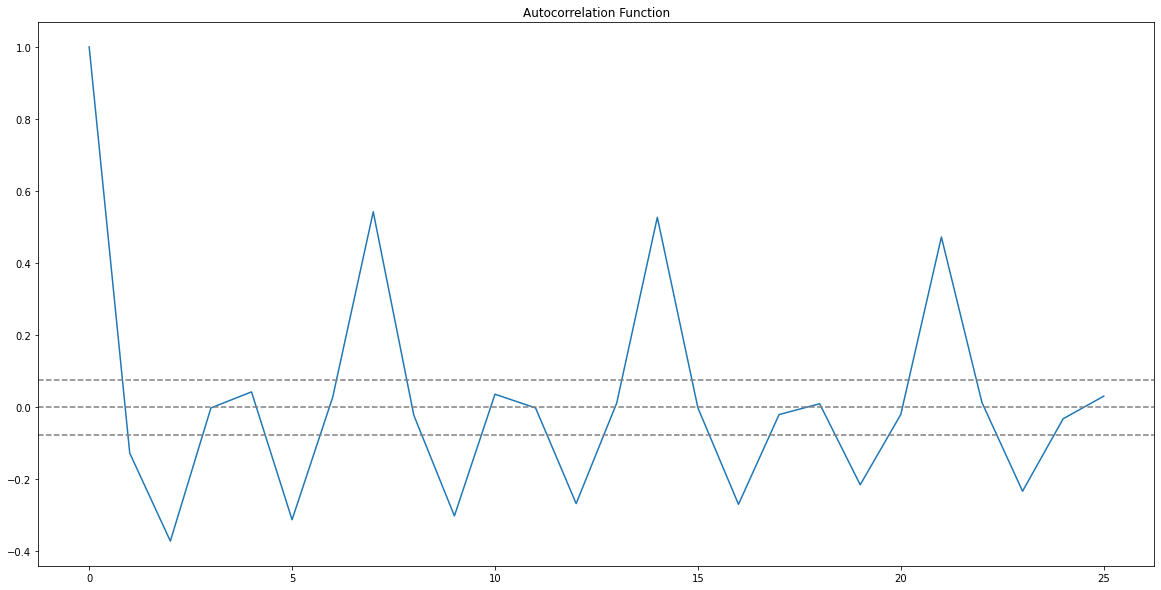

In [67]:
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

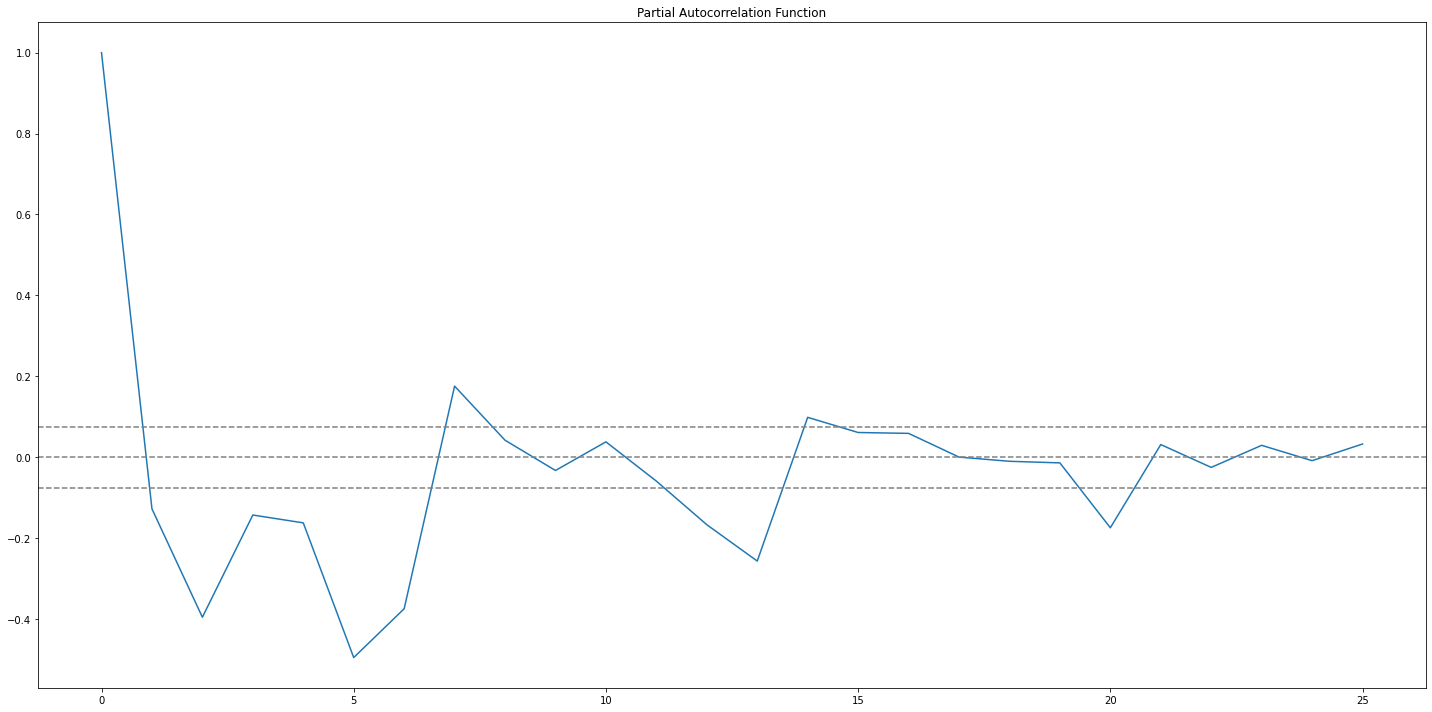

In [68]:
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

**AR Model**

Text(0.5, 1.0, 'RSS: 84.0207')

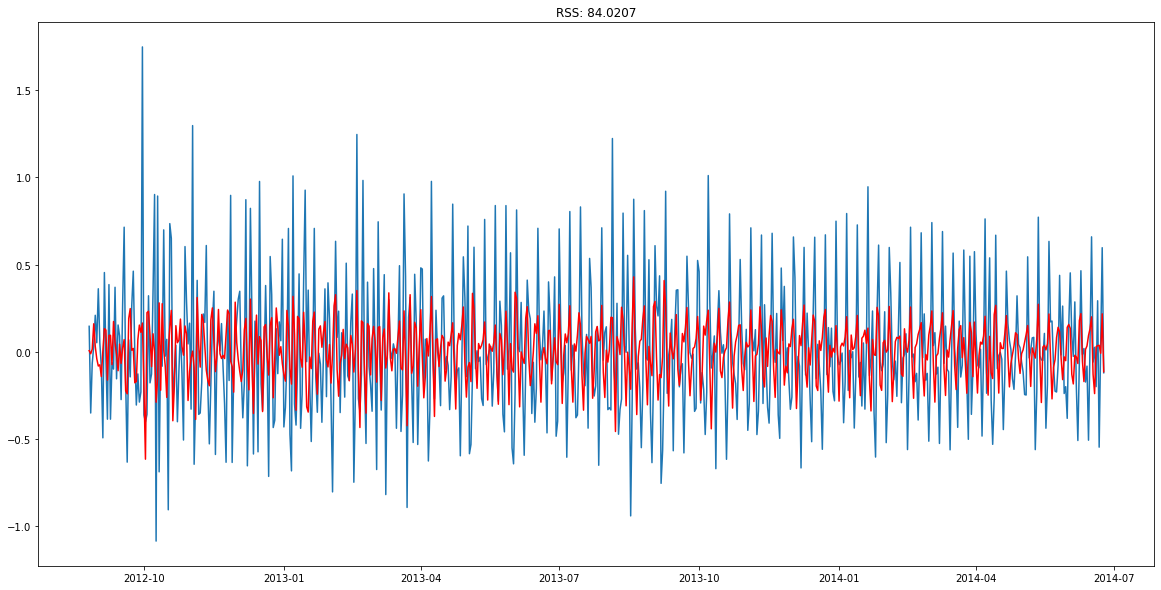

In [69]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(Train_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna())
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-train_log_diff.dropna())**2))

In [70]:
AR_predict = results_AR.predict(start='2014-06-25', end='2014-09-25')
AR_predict = AR_predict.cumsum().shift().fillna(0)
AR_predict1 = pd.Series(np.ones(valid.shape[0])*np.log(valid['Count'])[0], index = valid.index)
AR_predict1  = AR_predict1.add(AR_predict, fill_value=0)
AR_predict = np.exp(AR_predict1)

Text(0.5, 1.0, 'RMSE: 43.9740')

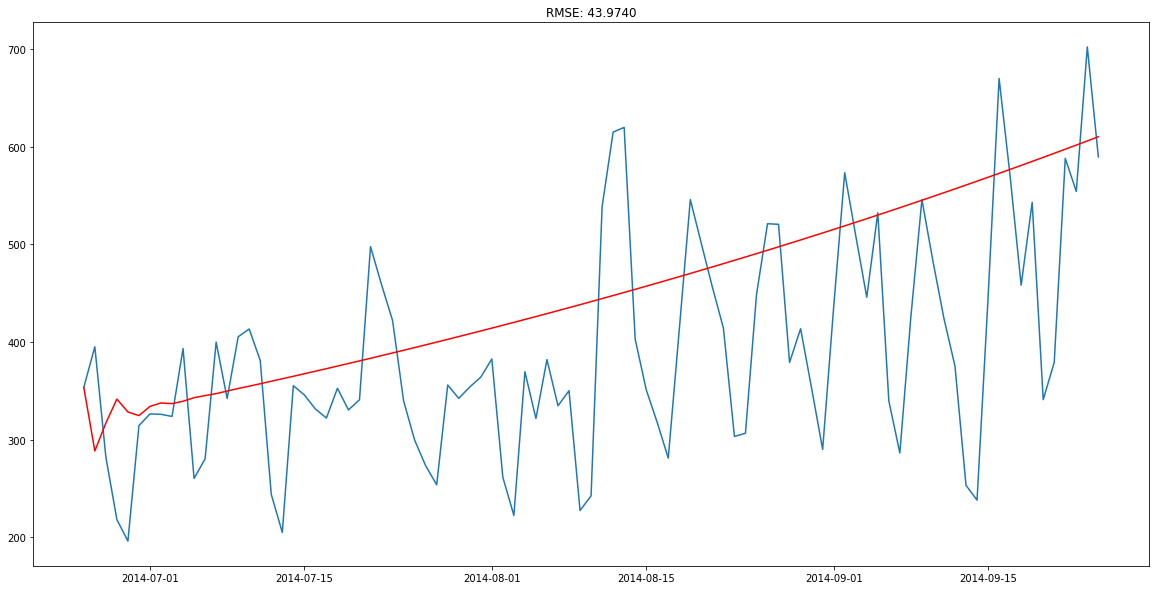

In [71]:
plt.plot(valid['Count'], label = 'Valid')
plt.plot(AR_predict, color='red', label = 'Predict')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, valid['Count']))/valid.shape[0]))

In [72]:
AR_predict_test = results_AR.forecast(len(test))
test['prediction'] = predict
merge = pd.merge(test, test_original, on=('day','month','year'), how='left')
merge['Hour'] = merge['Hour_y']
merge = merge.drop(['year', 'month', 'Datetime', 'Hour_x', 'Hour_y'], axis=1)
prediction = pd.merge(merge, temp2, on='Hour', how='left')

prediction['Count'] = prediction['prediction']*prediction['ratio']*24
prediction['ID'] = prediction['ID_y']
submission = prediction.drop(['ID_x','day','ID_y','prediction', 'Hour', 'ratio'], axis=1)
pd.DataFrame(submission, columns=['ID', 'Count']).to_csv('AR.csv', index=False)

**MA Model**

Text(0.5, 1.0, 'RSS: 69.5439')

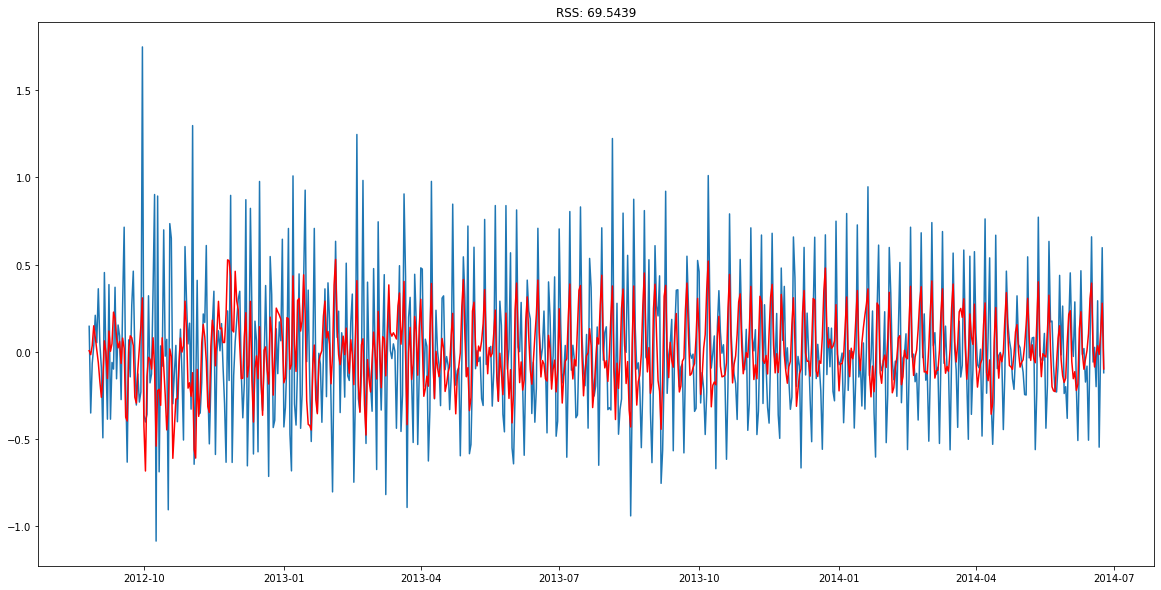

In [73]:
model = ARIMA(Train_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna())
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-train_log_diff.dropna())**2))

Text(0.5, 1.0, 'RMSE: 43.2697')

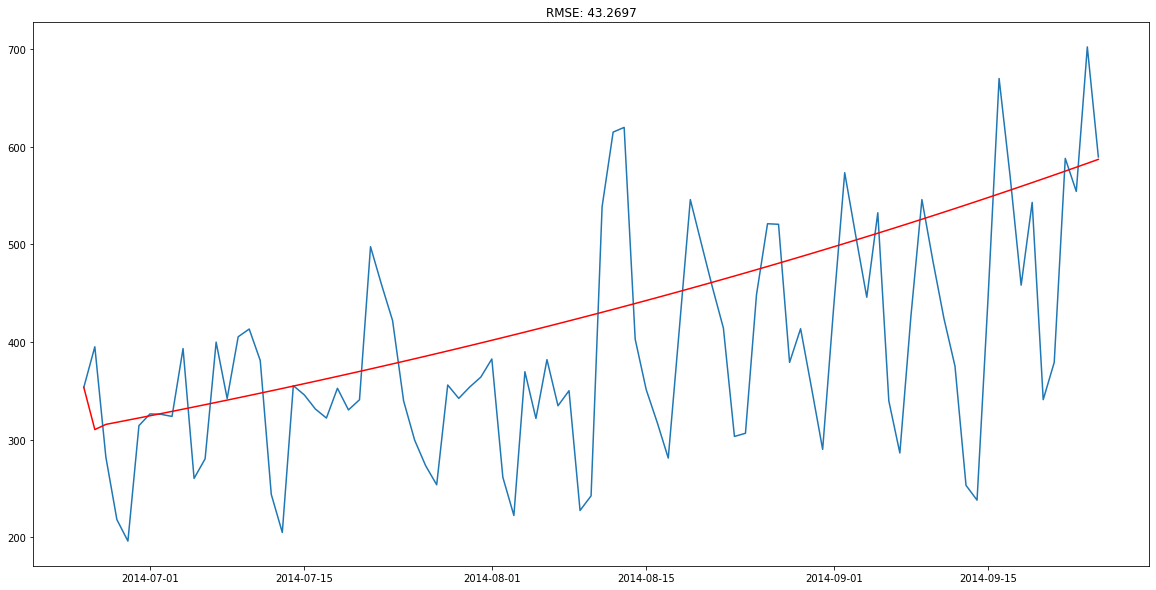

In [74]:
MA_predict = results_MA.predict(start='2014-06-25', end='2014-09-25')
MA_predict = MA_predict.cumsum().shift().fillna(0)
MA_predict1 = pd.Series(np.ones(valid.shape[0])*np.log(valid['Count'])[0], index = valid.index)
MA_predict1  = MA_predict1.add(MA_predict, fill_value=0)
MA_predict = np.exp(MA_predict1)

plt.plot(valid['Count'], label = 'Valid')
plt.plot(MA_predict, color='red', label = 'Predict')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, valid['Count']))/valid.shape[0]))

In [75]:
MA_predict_test = results_MA.forecast(len(test))
test['prediction'] = predict
merge = pd.merge(test, test_original, on=('day','month','year'), how='left')
merge['Hour'] = merge['Hour_y']
merge = merge.drop(['year', 'month', 'Datetime', 'Hour_x', 'Hour_y'], axis=1)
prediction = pd.merge(merge, temp2, on='Hour', how='left')

prediction['Count'] = prediction['prediction']*prediction['ratio']*24
prediction['ID'] = prediction['ID_y']
submission = prediction.drop(['ID_x','day','ID_y','prediction', 'Hour', 'ratio'], axis=1)
pd.DataFrame(submission, columns=['ID', 'Count']).to_csv('MA.csv', index=False)

**Combined Model**

Text(0.5, 1.0, 'RSS: 68.5039')

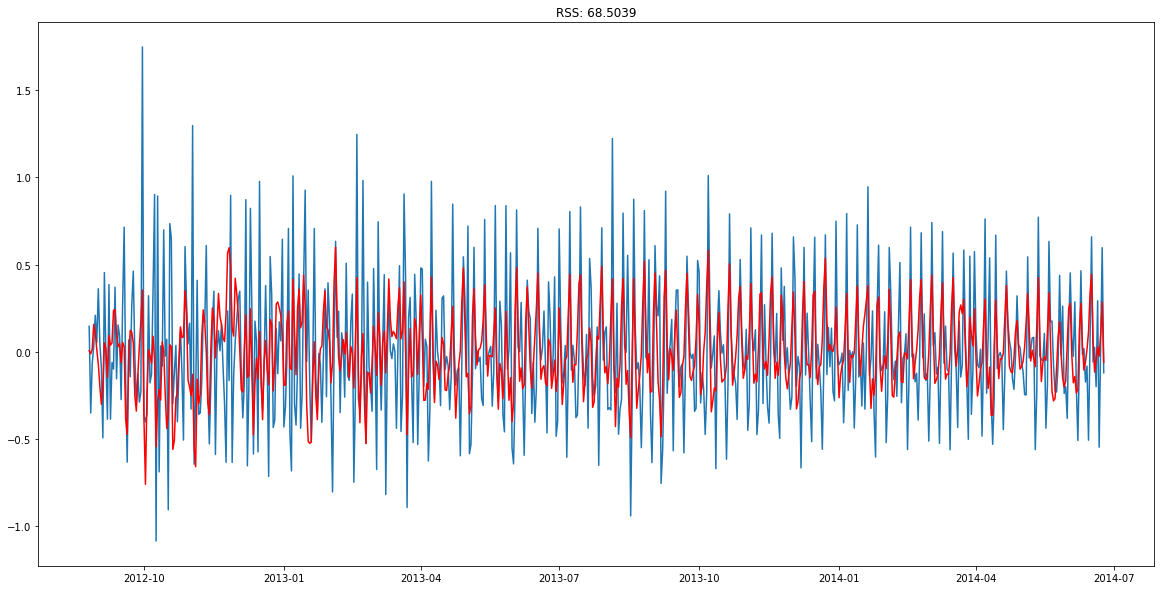

In [76]:
model = ARIMA(Train_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna())
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-train_log_diff.dropna())**2))

In [77]:
def check_prediction_diff(predict_diff, given_set):
  predict_diff = predict_diff.cumsum().shift().fillna(0)
  predict_base = pd.Series(np.ones(given_set.shape[0])*np.log(given_set['Count'])[0], index = given_set.index)
  predict_log  = predict_base.add(predict_diff, fill_value=0)
  predict = np.exp(predict_log)
  plt.plot(given_set['Count'], label = 'given_set')
  plt.plot(predict, color='red', label = 'Predict')
  plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
  plt.show()

In [78]:
def check_prediction_log(predict_log, given_set):
  predict = np.exp(predict_log)
  plt.plot(given_set['Count'], label = 'given_set')
  plt.plot(predict, color='red', label = 'Predict')
  plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
  plt.show()

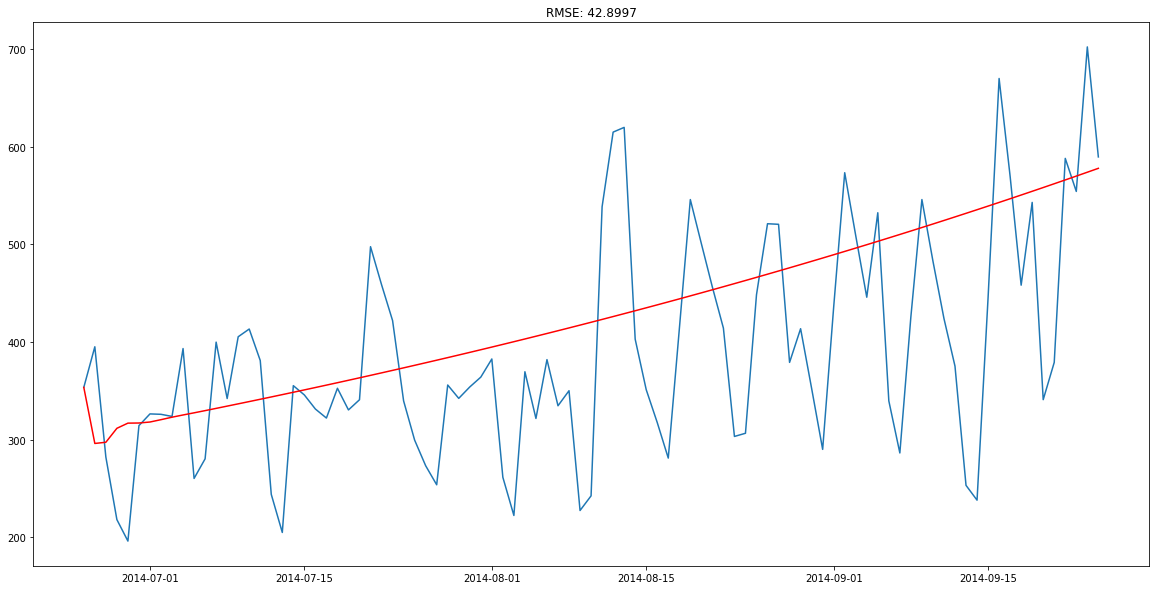

In [79]:
ARIMA_predict_diff = results_ARIMA.predict(start='2014-06-25', end='2014-09-25')
check_prediction_diff(ARIMA_predict_diff,valid)

**SARIMAX**

In [80]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


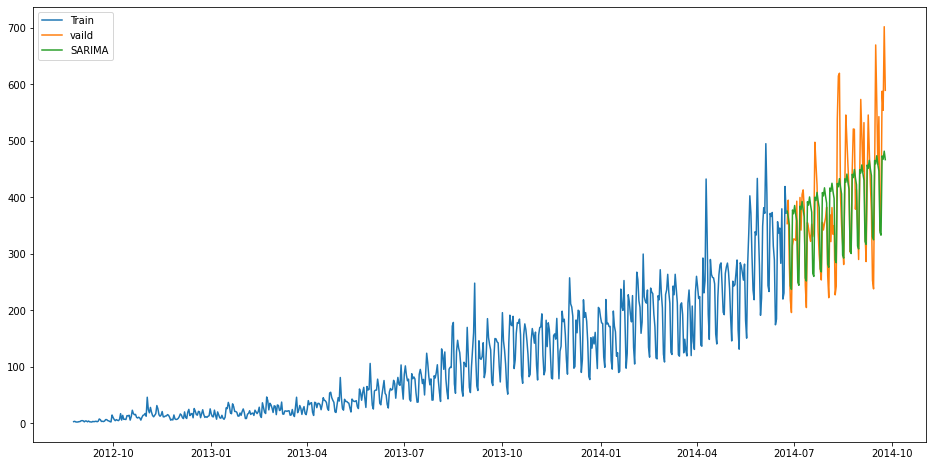

In [81]:
y_hat_avg = valid.copy()
fit1 = sm.tsa.statespace.SARIMAX(Train.Count, order=(2,1,4), seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start='2014-06-25', end='2014-09-25', dynamic=True)
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='vaild')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [82]:
rmse = sqrt(mean_squared_error(valid.Count,y_hat_avg.SARIMA))
print(rmse)

69.7096906968534


In [83]:
predict = fit1.predict(start='2014-09-26', end='2015-04-26', dynamic=True)
test['prediction'] = predict
merge = pd.merge(test, test_original, on=('day','month','year'), how='left')
merge['Hour'] = merge['Hour_y']
merge = merge.drop(['year', 'month', 'Datetime', 'Hour_x', 'Hour_y'], axis=1)
prediction = pd.merge(merge, temp2, on='Hour', how='left')

prediction['Count'] = prediction['prediction']*prediction['ratio']*24
prediction['ID'] = prediction['ID_y']
submission = prediction.drop(['ID_x','day','ID_y','prediction', 'Hour', 'ratio'], axis=1)
pd.DataFrame(submission, columns=['ID', 'Count']).to_csv('SARIMA.csv', index=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:1960: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


In [84]:
submission

,Count,ID
0,483.626570,18288
1,385.959305,18289
2,326.640450,18290
3,269.891335,18291
4,227.168352,18292
...,...,...
5107,780.675887,23395
5108,750.202567,23396
5109,700.234715,23397
5110,702.775079,23398
